In [1]:
import sys
sys.path.append("/u/lukas.rilling/dev/")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
%matplotlib widget

from returnn_training_progress import get_epoch_data
from returnn_training_plot_nb import plot_df
%load_ext autoreload
%autoreload 2

In [2]:
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/newbob/*/not_silence_preprocessed/training/"
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/speaker_drop/p_speaker_drop_*_not_silence_preprocessed/training/"
lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector*/enc192/100ep*/not_silence_preprocessed/training"
# lr_files = "/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_100ep_not_silence_preprocessed_speaker_drop_*/training"

lr_files = glob.glob(lr_files)

common_prefix = os.path.commonpath(lr_files)
common_sufix = os.path.commonpath([l[::-1] for l in lr_files])[::-1]

names = []
for f in lr_files:
    names.append(f.removeprefix(common_prefix).removesuffix(common_sufix))

files = dict(zip(lr_files, names))
files

{'/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v3_norm_xvector/enc192/100ep/not_silence_preprocessed/training': '/glowTTS_x_vector_v3_norm_xvector/enc192/100ep/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v2/enc192/100ep_x_vector_ep10/not_silence_preprocessed/training': '/glowTTS_x_vector_v2/enc192/100ep_x_vector_ep10/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v2/enc192/100ep/not_silence_preprocessed/training': '/glowTTS_x_vector_v2/enc192/100ep/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_eval/enc192/100ep/not_silence_preprocessed/training': '/glowTTS_x_vector_eval/enc192/100ep/',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experimen

In [3]:
lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS/enc192/100ep/not_silence_preprocessed/training")
files[lr_files[-1]] = "Baseline"
lr_files

# lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/no_glow/training")
# files[lr_files[-1]] = "Baseline Conformer Only"

# lr_files.append("/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/librispeech_glow_asr/pytorch/conformer/asr_dataset/spec_augment/glow_enc192_200ep_not_silence_preprocessed/training")
# files[lr_files[-1]] = "Baseline"


['/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v3_norm_xvector/enc192/100ep/not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v2/enc192/100ep_x_vector_ep10/not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v2/enc192/100ep/not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_eval/enc192/100ep/not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experiments/librispeech/tts_architecture/glow_tts/raw_audio/glowTTS_x_vector_v3/enc192/100ep/not_silence_preprocessed/training',
 '/u/lukas.rilling/experiments/glow_tts_asr_v2/alias/experime

Large Font: False
Setup Interactive Legend
Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))
self.on_pick: <bound method InteractiveLegend.on_pick of <returnn_training_plot_nb.InteractiveLegend object at 0x7fb9aef331f0>>
update


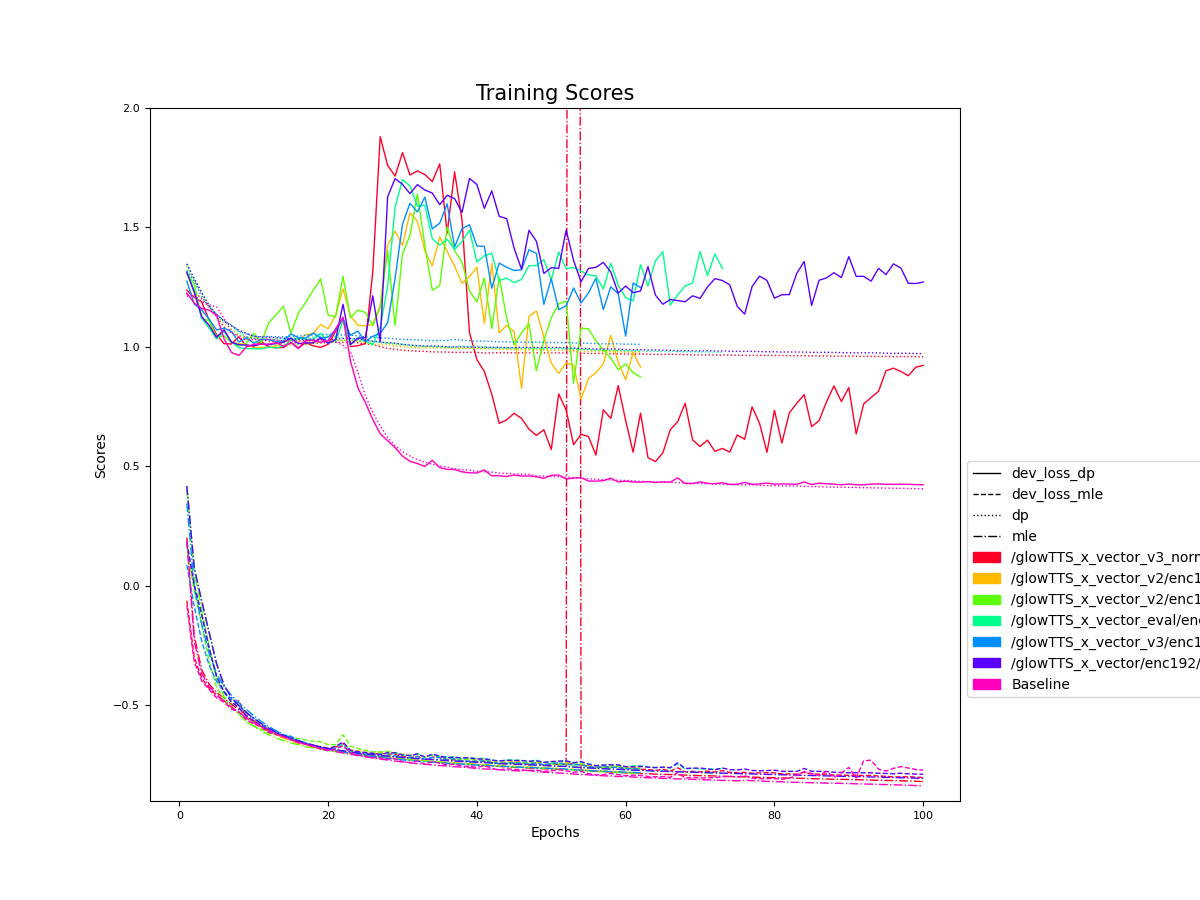

Handling pick
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Click
update
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click
Handling pick
Handling pick
update
Click


In [4]:
error_data = {}
labels = list(files.values())
for i, lr_file in enumerate(lr_files):
    data = get_epoch_data(lr_file, epoch=None)
    if data is None:
        continue
    for ep, ep_data in data.items():
        ep_data_error = ep_data.pop("error", {})
        error_data[(labels[i], ep)] = ep_data
        error_data[(labels[i], ep)].update(ep_data_error)
df = pd.DataFrame.from_dict(error_data, orient="index")
# plot_df(df.drop(["mle", "dp"], axis=1), plot_lr, large_font=True, shrink_axes=0.8)
plot_df(df, plot_lr=False, large_font=False, shrink_axes=0.8, ylim_max=2, ylim_min=-0.9)